# Proyek Pertama

## Import Library

In [26]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import OneHotEncoder
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
import joblib
import pkg_resources

/tmp/ipykernel_1666/984255459.py:15: DeprecationWarning: pkg_resources is deprecated as an API. See https://setuptools.pypa.io/en/latest/pkg_resources.html
  import pkg_resources


## Import Dataset

In [292]:
df = pd.read_csv('/home/riyan/Machine Learning Terapan/Proyek Pertama/healthcare-dataset-stroke-data.csv')
df

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
...,...,...,...,...,...,...,...,...,...,...,...,...
5105,18234,Female,80.0,1,0,Yes,Private,Urban,83.75,NaN,never smoked,0
5106,44873,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0
5107,19723,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0
5108,37544,Male,51.0,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,0


## Exploratory Data Analysis

### Gambaran Dataset

In [293]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


In [294]:
df.describe(include='all')

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
count,5110.000000,5110,5110.000000,5110.000000,5110.000000,5110,5110,5110,5110.000000,4909.000000,5110,5110.000000
unique,NaN,3,NaN,NaN,NaN,2,5,2,NaN,NaN,4,NaN
top,NaN,Female,NaN,NaN,NaN,Yes,Private,Urban,NaN,NaN,never smoked,NaN
freq,NaN,2994,NaN,NaN,NaN,3353,2925,2596,NaN,NaN,1892,NaN
mean,36517.829354,NaN,43.226614,0.097456,0.054012,NaN,NaN,NaN,106.147677,28.893237,NaN,0.048728
std,21161.721625,NaN,22.612647,0.296607,0.226063,NaN,NaN,NaN,45.283560,7.854067,NaN,0.215320
min,67.000000,NaN,0.080000,0.000000,0.000000,NaN,NaN,NaN,55.120000,10.300000,NaN,0.000000
25%,17741.250000,NaN,25.000000,0.000000,0.000000,NaN,NaN,NaN,77.245000,23.500000,NaN,0.000000
50%,36932.000000,NaN,45.000000,0.000000,0.000000,NaN,NaN,NaN,91.885000,28.100000,NaN,0.000000
75%,54682.000000,NaN,61.000000,0.000000,0.000000,NaN,NaN,NaN,114.090000,33.100000,NaN,0.000000


### Cek Data Missing

In [295]:
def missing_values(df):
    # Masukan nilai yang memungkinkan missing
    missing_values = ['', ' ', 'NaN', 'Nan', 'nan','NULL','Null','null','N/A','n/a', '.', ',','-','--','---', 'TIDAK ADA DATA', 'KOSONG']
    col_names = list(df.columns)
    df[col_names] = df[col_names].replace(missing_values, np.nan)

    # Hitung jumlah data yang kosong
    missing_values = df.isnull().sum()
    missing_values = pd.DataFrame(missing_values, columns=['count'])
    missing_values.reset_index(inplace=True)
    return missing_values

In [296]:
missing_values(df)

,index,count
0,id,0
1,gender,0
2,age,0
3,hypertension,0
4,heart_disease,0
5,ever_married,0
6,work_type,0
7,Residence_type,0
8,avg_glucose_level,0
9,bmi,201


### Cek Data Duplikat

In [297]:
print("Jumlah duplikat: ", df.duplicated().sum())

Jumlah duplikat:  0


### Distribusi Data

#### Distribusi Fitur Numerik

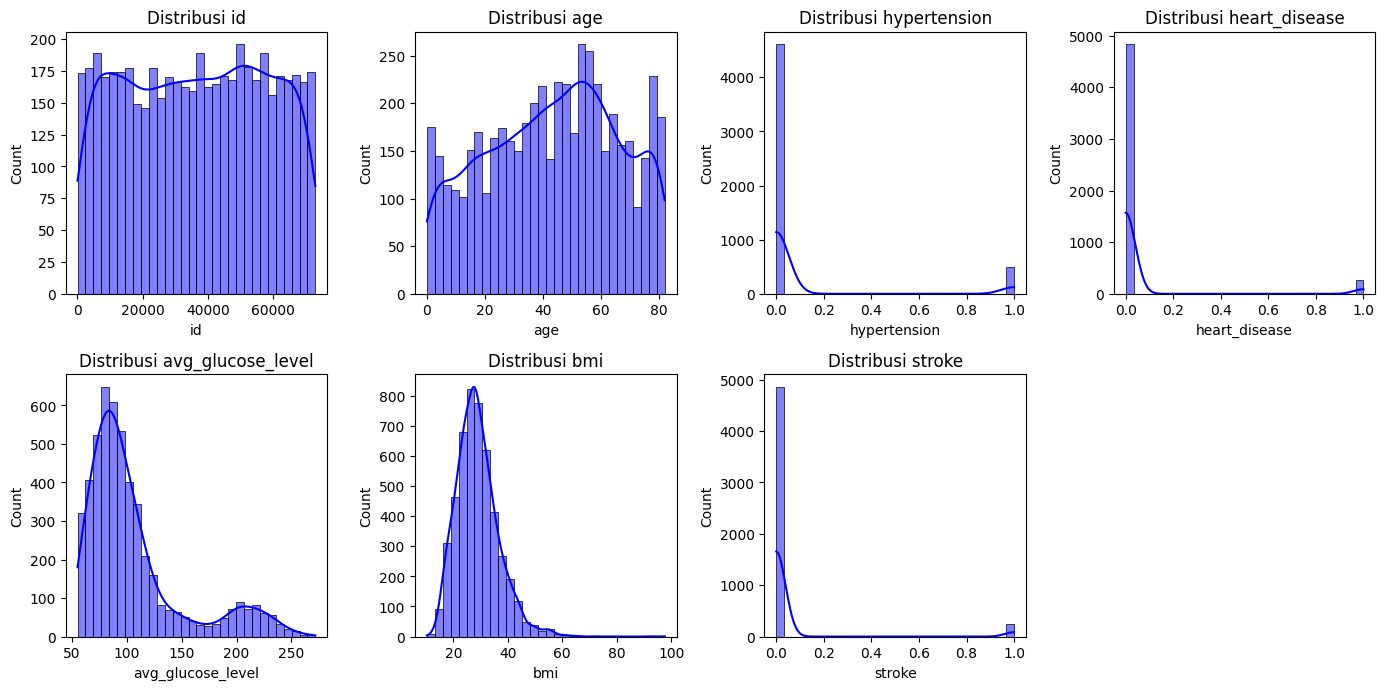

In [298]:
num_features = df.select_dtypes(include=[np.number])
plt.figure(figsize=(14, 10))
for i, column in enumerate(num_features.columns, 1):
    plt.subplot(3, 4, i)
    sns.histplot(df[column], bins=30, kde=True, color='blue')
    plt.title(f'Distribusi {column}')
plt.tight_layout()
plt.show()

#### Distribusi Fitur Kategorik

/tmp/ipykernel_454/1308561667.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y=df[column], palette='viridis')
/tmp/ipykernel_454/1308561667.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y=df[column], palette='viridis')
/tmp/ipykernel_454/1308561667.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y=df[column], palette='viridis')
/tmp/ipykernel_454/1308561667.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False`

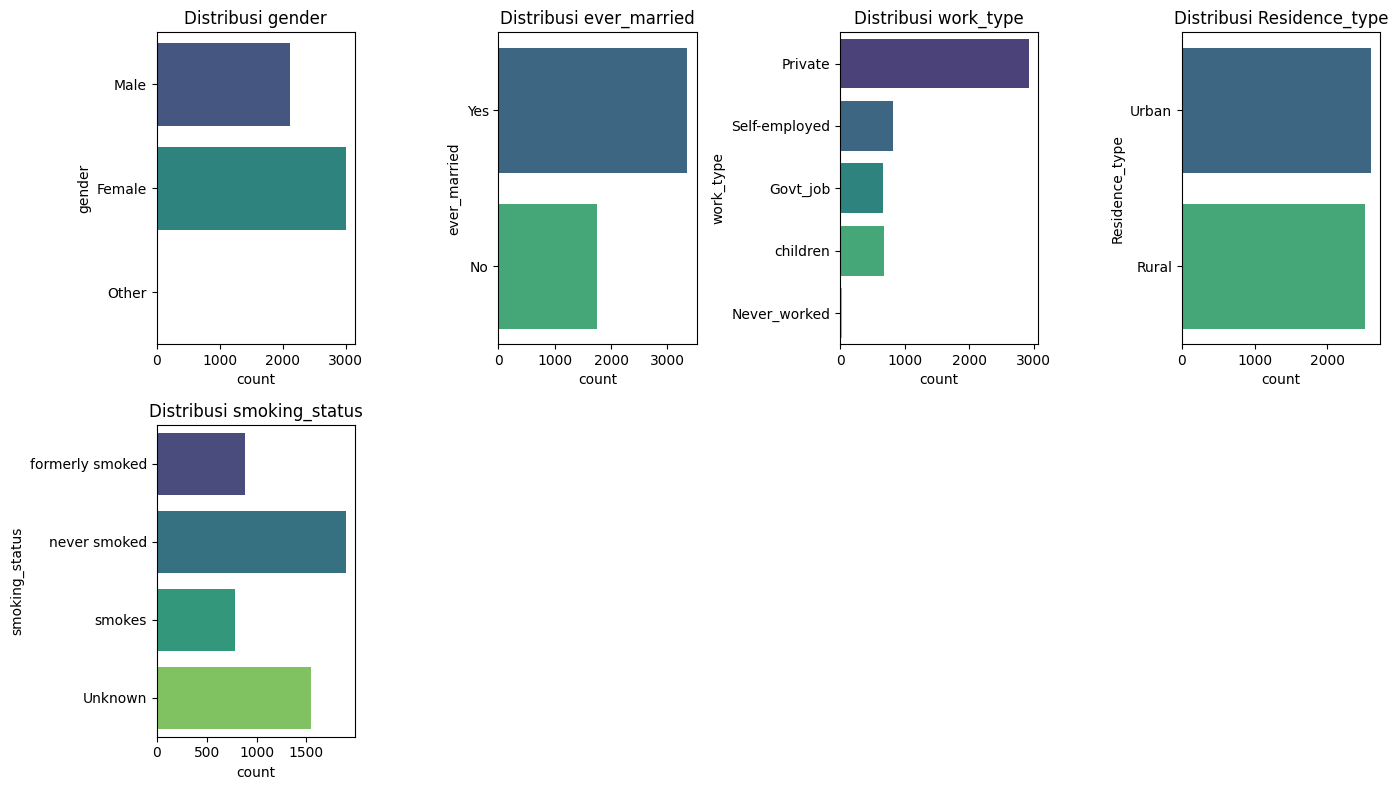

In [299]:
cat_features = df.select_dtypes(include=[object])
plt.figure(figsize=(14, 8))
for i, column in enumerate(cat_features.columns, 1):
    plt.subplot(2, 4, i)
    sns.countplot(y=df[column], palette='viridis')
    plt.title(f'Distribusi {column}')
plt.tight_layout()
plt.show()

### Matrik Korelasi

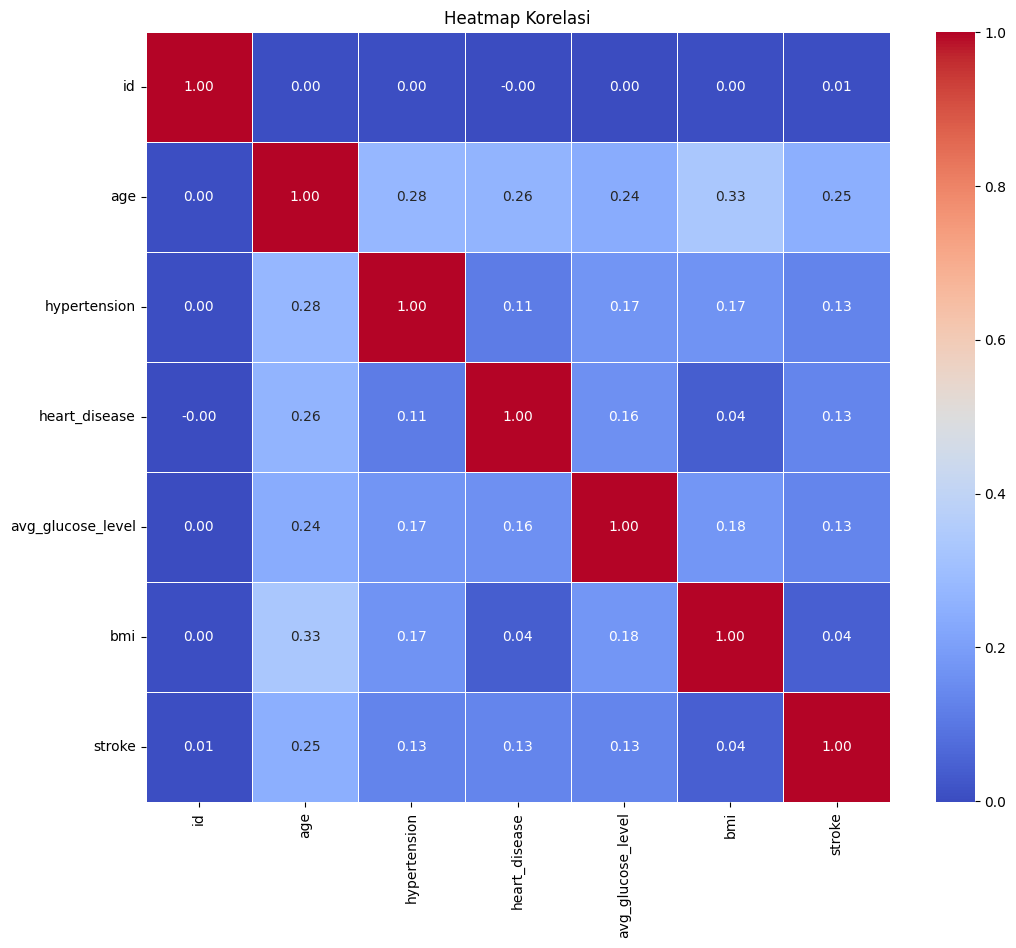

In [300]:
# Heatmap korelasi untuk fitur numerik
plt.figure(figsize=(12, 10))
correlation_matrix = num_features.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Heatmap Korelasi')
plt.show()

### Distribusi Label

/tmp/ipykernel_454/1744129157.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='stroke', data=df, palette='viridis')


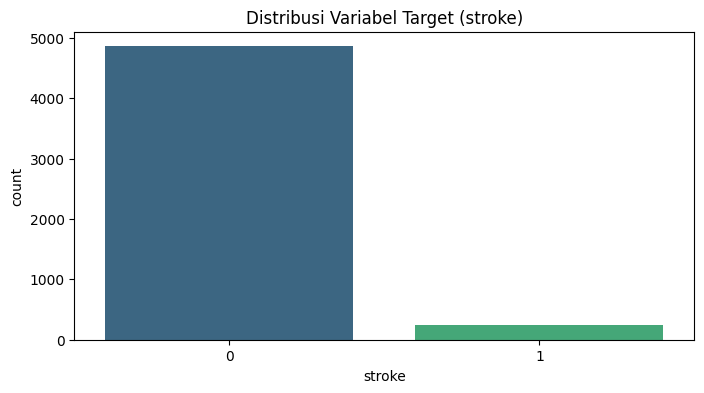

In [301]:
plt.figure(figsize=(8, 4))
sns.countplot(x='stroke', data=df, palette='viridis')
plt.title('Distribusi Variabel Target (stroke)')
plt.show()

## Data Preparation

### Hapus Data Missing

In [302]:
# Hapus data kosong
df = df.dropna()
df

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
5,56669,Male,81.0,0,0,Yes,Private,Urban,186.21,29.0,formerly smoked,1
...,...,...,...,...,...,...,...,...,...,...,...,...
5104,14180,Female,13.0,0,0,No,children,Rural,103.08,18.6,Unknown,0
5106,44873,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0
5107,19723,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0
5108,37544,Male,51.0,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,0


### One Hot Encoding

In [303]:
kategori_fitur = df.select_dtypes(include=['object']).columns
encoded = pd.get_dummies(df, columns=kategori_fitur)
encoded = encoded.astype(int)
encoded

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke,gender_Female,gender_Male,gender_Other,...,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,Residence_type_Rural,Residence_type_Urban,smoking_status_Unknown,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes
0,9046,67,0,1,228,36,1,0,1,0,...,0,1,0,0,0,1,0,1,0,0
2,31112,80,0,1,105,32,1,0,1,0,...,0,1,0,0,1,0,0,0,1,0
3,60182,49,0,0,171,34,1,1,0,0,...,0,1,0,0,0,1,0,0,0,1
4,1665,79,1,0,174,24,1,1,0,0,...,0,0,1,0,1,0,0,0,1,0
5,56669,81,0,0,186,29,1,0,1,0,...,0,1,0,0,0,1,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5104,14180,13,0,0,103,18,0,1,0,0,...,0,0,0,1,1,0,1,0,0,0
5106,44873,81,0,0,125,40,0,1,0,0,...,0,0,1,0,0,1,0,0,1,0
5107,19723,35,0,0,82,30,0,1,0,0,...,0,0,1,0,1,0,0,0,1,0
5108,37544,51,0,0,166,25,0,0,1,0,...,0,1,0,0,1,0,0,1,0,0


### Feature Selection

In [304]:
df = encoded.drop(columns=['id', 'Residence_type_Rural', 'Residence_type_Urban', 'smoking_status_Unknown', 'gender_Other'])
df
# 

,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke,gender_Female,gender_Male,ever_married_No,ever_married_Yes,work_type_Govt_job,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes
0,67,0,1,228,36,1,0,1,0,1,0,0,1,0,0,1,0,0
2,80,0,1,105,32,1,0,1,0,1,0,0,1,0,0,0,1,0
3,49,0,0,171,34,1,1,0,0,1,0,0,1,0,0,0,0,1
4,79,1,0,174,24,1,1,0,0,1,0,0,0,1,0,0,1,0
5,81,0,0,186,29,1,0,1,0,1,0,0,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5104,13,0,0,103,18,0,1,0,1,0,0,0,0,0,1,0,0,0
5106,81,0,0,125,40,0,1,0,0,1,0,0,0,1,0,0,1,0
5107,35,0,0,82,30,0,1,0,0,1,0,0,0,1,0,0,1,0
5108,51,0,0,166,25,0,0,1,0,1,0,0,1,0,0,1,0,0


In [330]:
df.describe(include='all')

,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke,gender_Female,gender_Male,ever_married_No,ever_married_Yes,work_type_Govt_job,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes
count,4909.000000,4909.000000,4909.000000,4909.000000,4909.000000,4909.000000,4909.000000,4909.000000,4909.000000,4909.000000,4909.000000,4909.000000,4909.000000,4909.000000,4909.000000,4909.000000,4909.000000,4909.000000
mean,42.854145,0.091872,0.049501,104.816052,28.448564,0.042575,0.590141,0.409656,0.347321,0.652679,0.128336,0.004482,0.572622,0.157873,0.136688,0.170503,0.377266,0.150132
std,22.575986,0.288875,0.216934,44.417384,7.843834,0.201917,0.491858,0.491820,0.476167,0.476167,0.334497,0.066801,0.494748,0.364659,0.343552,0.376113,0.484752,0.357238
min,0.000000,0.000000,0.000000,55.000000,10.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,25.000000,0.000000,0.000000,77.000000,23.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,44.000000,0.000000,0.000000,91.000000,28.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,60.000000,0.000000,0.000000,113.000000,33.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000
max,82.000000,1.000000,1.000000,271.000000,97.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


### Normalisasi Data

In [305]:
# Contoh data (misalnya X adalah fitur, y adalah label)
X = df.drop(columns=['stroke'])
y = df['stroke']

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_scaled = pd.DataFrame(X_scaled, columns=X.columns)
X_scaled = pd.concat([X_scaled.reset_index(drop=True), y.reset_index(drop=True)], axis=1)
X_scaled

,age,hypertension,heart_disease,avg_glucose_level,bmi,gender_Female,gender_Male,ever_married_No,ever_married_Yes,work_type_Govt_job,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes,stroke
0,1.069646,-0.318067,4.381968,2.773610,0.962821,-1.199942,1.200447,-0.729484,0.729484,-0.383706,-0.067095,0.863918,-0.432978,-0.397906,2.205673,-0.778346,-0.420302,1
1,1.645538,-0.318067,4.381968,0.004142,0.452814,-1.199942,1.200447,-0.729484,0.729484,-0.383706,-0.067095,0.863918,-0.432978,-0.397906,-0.453376,1.284775,-0.420302,1
2,0.272257,-0.318067,-0.228208,1.490198,0.707817,0.833374,-0.833023,-0.729484,0.729484,-0.383706,-0.067095,0.863918,-0.432978,-0.397906,-0.453376,-0.778346,2.379241,1
3,1.601238,3.143994,-0.228208,1.557746,-0.567199,0.833374,-0.833023,-0.729484,0.729484,-0.383706,-0.067095,-1.157518,2.309587,-0.397906,-0.453376,1.284775,-0.420302,1
4,1.689837,-0.318067,-0.228208,1.827938,0.070309,-1.199942,1.200447,-0.729484,0.729484,-0.383706,-0.067095,0.863918,-0.432978,-0.397906,2.205673,-0.778346,-0.420302,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4904,-1.322520,-0.318067,-0.228208,-0.040890,-1.332209,0.833374,-0.833023,1.370831,-1.370831,-0.383706,-0.067095,-1.157518,-0.432978,2.513155,-0.453376,-0.778346,-0.420302,0
4905,1.689837,-0.318067,-0.228208,0.454462,1.472827,0.833374,-0.833023,-0.729484,0.729484,-0.383706,-0.067095,-1.157518,2.309587,-0.397906,-0.453376,1.284775,-0.420302,0
4906,-0.347934,-0.318067,-0.228208,-0.513726,0.197811,0.833374,-0.833023,-0.729484,0.729484,-0.383706,-0.067095,-1.157518,2.309587,-0.397906,-0.453376,1.284775,-0.420302,0
4907,0.360856,-0.318067,-0.228208,1.377618,-0.439698,-1.199942,1.200447,-0.729484,0.729484,-0.383706,-0.067095,0.863918,-0.432978,-0.397906,2.205673,-0.778346,-0.420302,0


In [332]:
# Simpan scaler ke file 'scaler.joblib'
joblib.dump(scaler, '/home/riyan/Machine Learning Terapan/Proyek Pertama/scaler.joblib')

['/home/riyan/Machine Learning Terapan/Proyek Pertama/scaler.joblib']

### SMOTE

In [306]:
# Terapkan SMOTE
smote = SMOTE(sampling_strategy='auto', random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_scaled, y)
X_resampled = X_resampled.drop_duplicates()
X_resampled

,age,hypertension,heart_disease,avg_glucose_level,bmi,gender_Female,gender_Male,ever_married_No,ever_married_Yes,work_type_Govt_job,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes,stroke
0,1.069646,-0.318067,4.381968,2.773610,0.962821,-1.199942,1.200447,-0.729484,0.729484,-0.383706,-0.067095,0.863918,-0.432978,-0.397906,2.205673,-0.778346,-0.420302,1
1,1.645538,-0.318067,4.381968,0.004142,0.452814,-1.199942,1.200447,-0.729484,0.729484,-0.383706,-0.067095,0.863918,-0.432978,-0.397906,-0.453376,1.284775,-0.420302,1
2,0.272257,-0.318067,-0.228208,1.490198,0.707817,0.833374,-0.833023,-0.729484,0.729484,-0.383706,-0.067095,0.863918,-0.432978,-0.397906,-0.453376,-0.778346,2.379241,1
3,1.601238,3.143994,-0.228208,1.557746,-0.567199,0.833374,-0.833023,-0.729484,0.729484,-0.383706,-0.067095,-1.157518,2.309587,-0.397906,-0.453376,1.284775,-0.420302,1
4,1.689837,-0.318067,-0.228208,1.827938,0.070309,-1.199942,1.200447,-0.729484,0.729484,-0.383706,-0.067095,0.863918,-0.432978,-0.397906,2.205673,-0.778346,-0.420302,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9395,1.174391,3.143994,-0.228208,2.204524,-0.103428,0.278491,-0.278098,-0.729484,0.729484,-0.383706,-0.067095,-1.157518,2.309587,-0.397906,-0.453376,1.284775,-0.420302,1
9396,1.675577,-0.318067,-0.228208,-0.267594,0.311631,-0.981765,0.982254,-0.729484,0.729484,-0.383706,-0.067095,-1.157518,2.309587,-0.397906,-0.453376,1.284775,-0.420302,1
9397,1.109926,-0.318067,-0.228208,3.093092,0.928837,0.833374,-0.833023,-0.729484,0.729484,2.606159,-0.067095,-1.157518,-0.432978,-0.397906,-0.453376,0.859672,-0.420302,1
9398,0.757381,-0.318067,4.381968,2.553252,0.419378,0.833374,-0.833023,-0.729484,0.729484,-0.383706,-0.067095,0.863918,-0.432978,-0.397906,-0.453376,-0.473929,-0.420302,1


/tmp/ipykernel_454/557423402.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='stroke', data=X_resampled, palette='viridis')


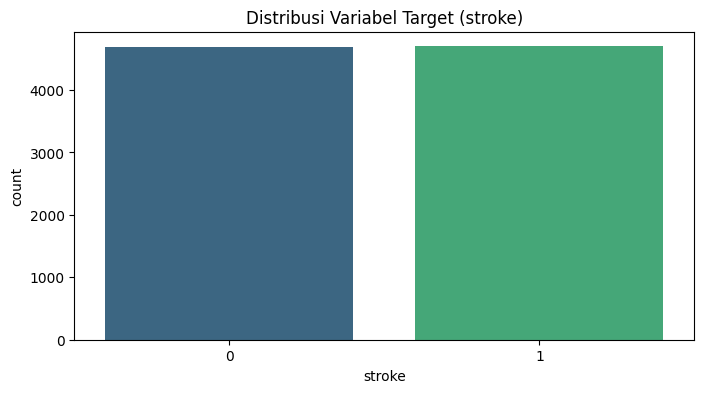

In [307]:
plt.figure(figsize=(8, 4))
sns.countplot(x='stroke', data=X_resampled, palette='viridis')
plt.title('Distribusi Variabel Target (stroke)')
plt.show()

## Modeling

### Spliting Data

In [308]:
X = X_resampled.drop(columns=['stroke'])  # Fitur
y = X_resampled['stroke']  # Label

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

### Training Model

In [309]:
# Buat model Random Forest
rf = RandomForestClassifier().fit(X_train, y_train)
knn = KNeighborsClassifier().fit(X_train, y_train)

## Evaluasi

In [310]:
def evaluate_model(model, X_test, y_test):
    y_pred = model.predict(X_test)
    cm = confusion_matrix(y_test, y_pred)
    tn, fp, fn, tp = cm.ravel()
    results = {
        'Confusion Matrix': cm,
        'True Positive (TP)': tp,
        'False Positive (FP)': fp,
        'False Negative (FN)': fn,
        'True Negative (TN)': tn,
        'Accuracy': accuracy_score(y_test, y_pred),
        'Precision': precision_score(y_test, y_pred),
        'Recall': recall_score(y_test, y_pred),
        'F1-Score': f1_score(y_test, y_pred)
    }
    return results

### Evaluasi Data Testing

In [311]:
results = {
    'Random Forest (RF)': evaluate_model(rf, X_test, y_test),
    'K-Nearest Neighbors (KNN)': evaluate_model(knn, X_test, y_test),
}

In [312]:
# Buat DataFrame untuk meringkas hasil
summary_df = pd.DataFrame(columns=['Model', 'Accuracy', 'Precision', 'Recall', 'F1-Score'])

# Isi DataFrame dengan hasil
rows = []
for model_name, metrics in results.items():
    rows.append({
        'Model': model_name,
        'Accuracy': metrics['Accuracy'],
        'Precision': metrics['Precision'],
        'Recall': metrics['Recall'],
        'F1-Score': metrics['F1-Score']
    })

# Konversi daftar kamus ke DataFrame
summary_df = pd.DataFrame(rows)

# Tampilkan DataFrame
print(summary_df)

                       Model  Accuracy  Precision    Recall  F1-Score
0         Random Forest (RF)  0.960064   0.948187  0.973404   0.96063
1  K-Nearest Neighbors (KNN)  0.914803   0.860444  0.990426   0.92087


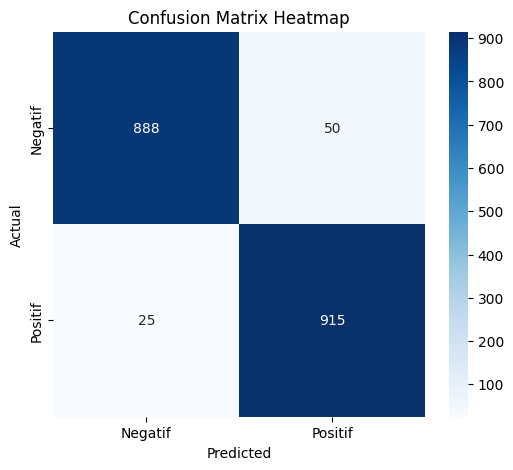

In [313]:
# Hitung confusion matrix
y_pred = rf.predict(X_test)
conf_matrix = confusion_matrix(y_test, y_pred)

# Buat heatmap menggunakan seaborn
plt.figure(figsize=(6, 5))  # Ukuran plot
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Negatif', 'Positif'], yticklabels=['Negatif', 'Positif'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix Heatmap')
plt.show()

In [314]:
# Classification Report
class_report = classification_report(y_test, y_pred)
print("\nClassification Report:")
print(class_report)


Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.95      0.96       938
           1       0.95      0.97      0.96       940

    accuracy                           0.96      1878
   macro avg       0.96      0.96      0.96      1878
weighted avg       0.96      0.96      0.96      1878



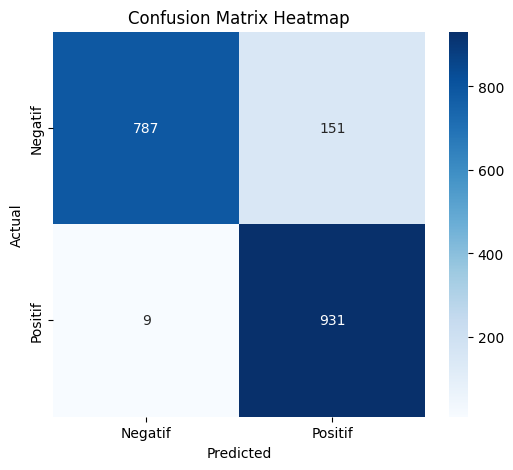

In [315]:
# Hitung confusion matrix
y_pred = knn.predict(X_test)
conf_matrix = confusion_matrix(y_test, y_pred)

# Buat heatmap menggunakan seaborn
plt.figure(figsize=(6, 5))  # Ukuran plot
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Negatif', 'Positif'], yticklabels=['Negatif', 'Positif'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix Heatmap')
plt.show()

In [316]:
# Classification Report
class_report = classification_report(y_test, y_pred)
print("\nClassification Report:")
print(class_report)


Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.84      0.91       938
           1       0.86      0.99      0.92       940

    accuracy                           0.91      1878
   macro avg       0.92      0.91      0.91      1878
weighted avg       0.92      0.91      0.91      1878



### Evaluasi Data Training

In [317]:
results = {
    'Random Forest (RF)': evaluate_model(rf, X_train, y_train),
    'K-Nearest Neighbors (KNN)': evaluate_model(knn, X_train, y_train)
}

In [318]:
# Buat DataFrame untuk meringkas hasil
summary_df = pd.DataFrame(columns=['Model', 'Accuracy', 'Precision', 'Recall', 'F1-Score'])

# Isi DataFrame dengan hasil
rows = []
for model_name, metrics in results.items():
    rows.append({
        'Model': model_name,
        'Accuracy': metrics['Accuracy'],
        'Precision': metrics['Precision'],
        'Recall': metrics['Recall'],
        'F1-Score': metrics['F1-Score']
    })

# Konversi daftar kamus ke DataFrame
summary_df = pd.DataFrame(rows)

# Tampilkan DataFrame
print(summary_df)

                       Model  Accuracy  Precision    Recall  F1-Score
0         Random Forest (RF)  0.999867   0.999734  1.000000  0.999867
1  K-Nearest Neighbors (KNN)  0.933688   0.888333  0.992287  0.937437


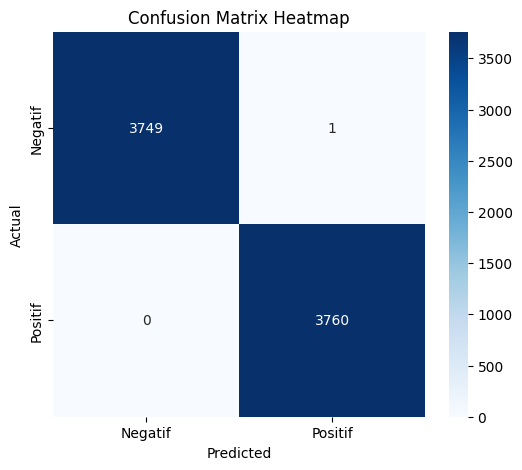

In [319]:
# Hitung confusion matrix
y_pred = rf.predict(X_train)
conf_matrix = confusion_matrix(y_train, y_pred)

# Buat heatmap menggunakan seaborn
plt.figure(figsize=(6, 5))  # Ukuran plot
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Negatif', 'Positif'], yticklabels=['Negatif', 'Positif'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix Heatmap')
plt.show()

In [320]:
# Classification Report
class_report = classification_report(y_train, y_pred)
print("\nClassification Report:")
print(class_report)


Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      3750
           1       1.00      1.00      1.00      3760

    accuracy                           1.00      7510
   macro avg       1.00      1.00      1.00      7510
weighted avg       1.00      1.00      1.00      7510



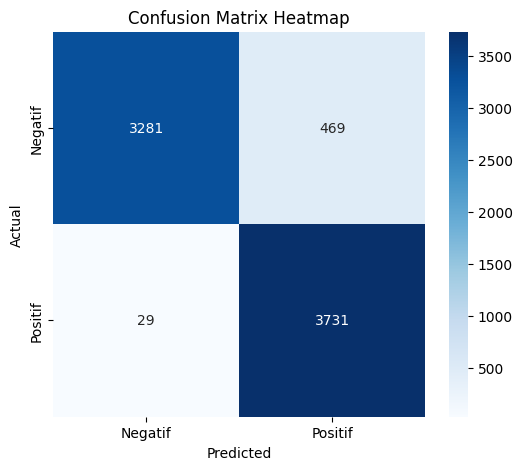

In [321]:
# Hitung confusion matrix
y_pred = knn.predict(X_train)
conf_matrix = confusion_matrix(y_train, y_pred)

# Buat heatmap menggunakan seaborn
plt.figure(figsize=(6, 5))  # Ukuran plot
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Negatif', 'Positif'], yticklabels=['Negatif', 'Positif'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix Heatmap')
plt.show()

In [322]:
# Classification Report
class_report = classification_report(y_train, y_pred)
print("\nClassification Report:")
print(class_report)


Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.87      0.93      3750
           1       0.89      0.99      0.94      3760

    accuracy                           0.93      7510
   macro avg       0.94      0.93      0.93      7510
weighted avg       0.94      0.93      0.93      7510



## Kesimpulan

## Simpan Model

In [326]:
joblib.dump(rf, '/home/riyan/Machine Learning Terapan/Proyek Pertama/best_model.joblib')

['/home/riyan/Machine Learning Terapan/Proyek Pertama/best_model.joblib']

## Simpan Library

In [27]:
installed_packages = {pkg.key for pkg in pkg_resources.working_set}

# Menyimpan nama library beserta versi yang digunakan ke file requirements.txt
with open('/home/riyan/Machine Learning Terapan/Proyek Pertama/requirements.txt', 'w') as f:
    for package in sorted(installed_packages):
        version = pkg_resources.get_distribution(package).version
        f.write(f"{package}=={version}\n")